ValueError: x and y must have same first dimension, but have shapes (365,) and (5,)

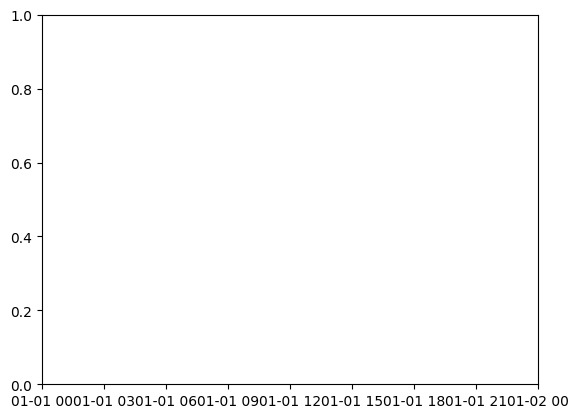

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define parameters
num_stores = 5
num_time_periods = (
    365  # Extend the simulation for a longer period to capture seasonality
)

# Generate random mean sales and standard deviation for each store
mean_sales = np.random.uniform(1500, 2500, num_stores)
std_dev_sales = np.random.uniform(500, 1000, num_stores)

# Define coefficients for weekday, seasonality, holidays, and other categorical factors
weekday_factors = {
    "Monday": 0.9,
    "Tuesday": 0.95,
    "Wednesday": 1.0,
    "Thursday": 1.0,
    "Friday": 1.1,
    "Saturday": 1.3,
    "Sunday": 1.2,
}

seasonality_factors = {
    1: 1.0,  # January
    2: 1.1,  # February
    3: 1.2,  # March
    4: 1.3,  # April
    5: 1.25,  # May
    6: 1.3,  # June
    7: 1.35,  # July
    8: 1.23,  # August
    9: 1.4,  # September
    10: 1.5,  # October
    11: 2,  # November
    12: 2.2,  # December
}

# Define holidays (for illustration purposes)
holidays = ["2020-07-04", "2020-12-25"]  # Independence Day and Christmas Day

# Define two additional categorical coefficients
# For illustration, let's consider store type and promotional events
store_types = {
    0: "Supermarket",
    1: "Department Store",
    2: "Clothing Store",
    3: "Electronics Store",
    4: "Home Improvement Store",
}

# Simulate promotional events randomly occurring for each time period
promotional_events = np.random.choice([True, False], size=num_time_periods)

# Create a time series starting from 1-1-2020
start_date = "2020-01-01"
dates = pd.date_range(start=start_date, periods=num_time_periods, freq="D")


# Initialize array to store sales data
sales_data = np.zeros((num_time_periods, num_stores))

# Generate random sales data with variability based on factors
for i in range(num_stores):
    for j in range(num_time_periods):
        # Calculate sales based on mean and standard deviation, adjusted by factors
        sales = np.random.normal(mean_sales[i], std_dev_sales[i])

        # Apply weekday factor
        sales *= weekday_factors[dates[j].day_name()]

        # Apply seasonality factor
        sales *= seasonality_factors[dates[j].month]

        # Apply holiday factor
        if dates[j].strftime("%Y-%m-%d") in holidays:
            sales *= 1.5  # Example: Increase sales by 50% on holidays

        # Apply other categorical coefficients
        # For illustration, let's use store type and promotional events
        if store_types[i] == "Supermarket":
            sales *= 1.1  # Example: Supermarkets have 10% higher sales
        if promotional_events[j]:
            sales *= 1.2  # Example: Sales increase by 20% during promotional events

        sales_data[j, i] = sales

# Create DataFrame for sales data
df_sales = pd.DataFrame(
    sales_data, index=dates, columns=[f"Store {i+1}" for i in range(num_stores)]
)

# Plot sales data for each store
for i in range(num_stores):
    plt.plot(
        dates,
        sales_data[i],
        label=f"{store_types[i]}\nMean: {mean_sales[i]:.2f}, Std Dev: {std_dev_sales[i]:.2f}",
    )

plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_sales

In [5]:
# Create DataFrame for sales data
df_sales = pd.DataFrame(sales_data)

# Perform linear regression
X = df_sales[["Date"]]
y = df_sales["Sales"]
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

KeyError: "None of [Index(['Date'], dtype='object')] are in the [columns]"